# 예제 6.4 Sobel 필터 2: edge gradient orientation

In [1]:
import cv2
import numpy as np

src = np.zeros(shape = (512,512), dtype = np.uint8) + 255
pt1 = 100, 100 # tuple
pt2 = 400, 400

cv2.rectangle(src, pt1, pt2, 0, 2)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### <span style='background-color:#000a4e'>cv2.cartToPolar(gx, gy, angleInDegrees)</span>
gradient 크기 mag와 각도 angle 계산

In [2]:
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees = True)
for i in angle[95:105,]:
    for j in i[95:105]:
        print(int(j), end=" ")
    print()
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
minVal, maxVal, minLoc, maxLoc

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 224 251 270 270 270 270 
0 0 0 224 224 243 270 270 270 270 
0 0 0 198 206 224 0 0 0 0 
0 0 0 180 180 0 44 71 90 90 
0 0 0 180 180 0 18 44 90 90 
0 0 0 180 180 0 0 0 0 0 
0 0 0 180 180 0 0 0 0 0 


(0.0, 341.5613098144531, (0, 0), (402, 100))

In [3]:
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
edge

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
height, width = mag.shape[:2]
angleM = np.full((height, width, 3), (255, 255, 255), dtype = np.uint8)
print(angleM.shape)
for y in range(height):
    for x in range(width):
        if edge[y,x] != 0:
            if angle[y,x] == 0:
                angleM[y,x] = (0,0,255)
            elif angle[y,x] == 90:
                angleM[y,x] = (0,255,0)
            elif angle[y,x] == 180:
                angleM[y,x] = (255,0,0)
            elif angle[y,x] == 270:
                angleM[y,x] == (0,255,255)
            else:
                angleM[y,x] = (128,128,128)

(512, 512, 3)


In [5]:
cv2.imshow('src', src)
cv2.imshow('edge', edge)
cv2.imshow('angleM', angleM)
cv2.waitKey()
cv2.destroyAllWindows()

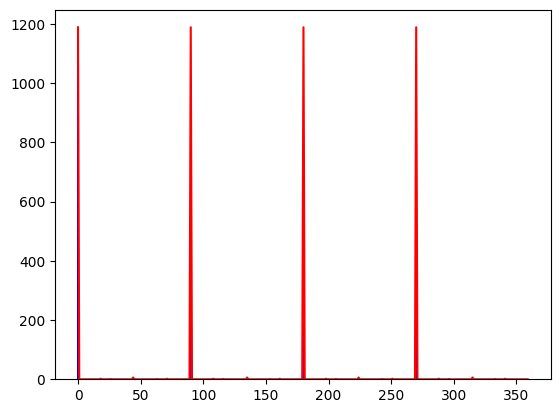

In [6]:
import matplotlib.pyplot as plt

hist = cv2.calcHist(images = [angle], channels = [0], mask = edge, histSize = [360], ranges = [0,360])
hist = hist.flatten()
plt.plot(hist, color = 'r')
binX = np.arange(360)
plt.bar(binX, hist, width = 1, color = 'b')
plt.show()